In [1]:
# first day imports
import acquire
import prepare
import unicodedata
import re
import nltk
import nltk.sentiment
import os
import requests
import time
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.max_columns = 61
pd.options.display.max_rows = 61

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy import stats
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Wrangle

In [2]:
# load data
df = acquire.get_df()

In [3]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             230 non-null    object
 1   language         221 non-null    object
 2   readme_contents  230 non-null    object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
# prep data and check
df = prepare.prep_repo_data(df)
df.head()

,repo,language,readme_contents,link,clean,stemmed,lemmatized
0,assaf/zombie,JavaScript,"# Zombie.js\n### Insanely fast, headless full-...",https://github.com/assaf/zombie,zombiejs insanely fast headless fullstack test...,zombiej insan fast headless fullstack test use...,zombiejs insanely fast headless fullstack test...
1,IAIK/ZombieLoad,C,# ZombieLoad PoC\n\nThis repository contains s...,https://github.com/IAIK/ZombieLoad,zombieload pocthis repository contains several...,zombieload pocthi repositori contain sever app...,zombieload pocthis repository contains several...
3,amazon-archives/aws-lambda-zombie-workshop,JavaScript,# This workshop is no longer actively being ma...,https://github.com/amazon-archives/aws-lambda-...,this workshop is no longer actively being main...,thi workshop longer activ maintain recommend u...,workshop longer actively maintained recommende...
5,sivvig/ZombieBird,Java,# ZombieBird\nLibGDX Zombie Bird Tutorial Fina...,https://github.com/sivvig/ZombieBird,zombiebirdlibgdx zombie bird tutorial final ou...,zombiebirdlibgdx zombi bird tutori final outpu...,zombiebirdlibgdx zombie bird tutorial final ou...
7,codeschool/RFZ2-ZombieTweets,Ruby,Rails for Zombies 2 App\n=====================...,https://github.com/codeschool/RFZ2-ZombieTweets,rails for zombies 2 appthis app is a mixup of ...,rail zombi 2 appthi app mixup code slide combi...,rail zombie 2 appthis app mixup code slide com...


In [5]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 229
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             181 non-null    object
 1   language         181 non-null    object
 2   readme_contents  181 non-null    object
 3   link             181 non-null    object
 4   clean            181 non-null    object
 5   stemmed          181 non-null    object
 6   lemmatized       181 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


### Preparations Taken
* created a link column with the url to the repo
* created clean, stemmed, and lemmatized columns

In [6]:
# split data before exploration
train, validate, test = prepare.split_data(df)

In [7]:
print(f"Percent of JavaScript language in overall data: {round(len(df[df.language == 'JavaScript']) / len(df) * 100, 2)}%")

Percent of JavaScript language in overall data: 12.15%


In [8]:
print(f"Percent of JavaScript language in train data: {round(len(train[train.language == 'JavaScript']) / len(train) * 100, 2)}%")

Percent of JavaScript language in train data: 12.0%


In [9]:
print(f"Percent of JavaScript language in validate data: {round(len(validate[validate.language == 'JavaScript']) / len(validate) * 100, 2)}%")

Percent of JavaScript language in validate data: 13.64%


In [10]:
print(f"Percent of JavaScript language in test data: {round(len(test[test.language == 'JavaScript']) / len(test) * 100, 2)}%")

Percent of JavaScript language in test data: 10.81%


Split done correctly

# Explore 

In [11]:
# view distribution of target variable
df.language.value_counts()

C#            22
JavaScript    22
C             20
HTML          20
SourcePawn    20
PHP           20
Java          13
C++           13
Lua           11
Python        10
Ruby          10
Name: language, dtype: int64

In [12]:
# preview explorable data
train.head()

,repo,language,readme_contents,link,clean,stemmed,lemmatized
219,hugo451/zombiesland,C,# ZombieLand - Documentação\n<p>Projeto final ...,https://github.com/hugo451/zombiesland,zombieland documentacaopprojeto final da disci...,zombieland documentacaopprojeto final da disci...,zombieland documentacaopprojeto final da disci...
145,kz26/uchicago-hvz,HTML,# University of Chicago Humans versus Zombies\...,https://github.com/kz26/uchicago-hvz,university of chicago humans versus zombies de...,univers chicago human versu zombi descriptiont...,university chicago human versus zombie descrip...
76,dmcinnes/dead-valley,JavaScript,Dead Valley\n===========\n\nEscape from Zombie...,https://github.com/dmcinnes/dead-valley,dead valleyescape from zombieinfested dead val...,dead valleyescap zombieinfest dead valley thi ...,dead valleyescape zombieinfested dead valley h...
111,TheJosh/chaotic-rage,C++,Chaotic Rage\n============\n\n[![Build Status]...,https://github.com/TheJosh/chaotic-rage,chaotic ragebuild statushttpstravisciorgthejos...,chaotic ragebuild statushttpstravisciorgthejos...,chaotic ragebuild statushttpstravisciorgthejos...
87,CSCI-E32/zombietranslator,HTML,*The end is nigh!*\nBut we can prepare. In thi...,https://github.com/CSCI-E32/zombietranslator,the end is nighbut we can prepare in this assi...,end nighbut prepar thi assign begin prepar end...,end nighbut prepare assignment begin preparing...


In [13]:
# create message length column
train['message_length'] = train.lemmatized.apply(len)

In [14]:
# get explorable data set info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 219 to 196
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         100 non-null    object
 2   readme_contents  100 non-null    object
 3   link             100 non-null    object
 4   clean            100 non-null    object
 5   stemmed          100 non-null    object
 6   lemmatized       100 non-null    object
 7   message_length   100 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 7.0+ KB


In [15]:
# view distribution of target in train set
train.language.value_counts()

JavaScript    12
C#            12
C             11
HTML          11
PHP           11
SourcePawn    11
Java           7
C++            7
Python         6
Lua            6
Ruby           6
Name: language, dtype: int64

In [16]:
# create sentiment analyzer object
vader = nltk.sentiment.SentimentIntensityAnalyzer()

# get sentimentality scores 
train['original_sentiment'] = train.readme_contents.apply(lambda x: vader.polarity_scores(x)['compound'])
train['clean_sentiment'] = train.clean.apply(lambda x: vader.polarity_scores(x)['compound'])
train['stemmed_sentiment'] = train.stemmed.apply(lambda x: vader.polarity_scores(x)['compound'])
train['lemmatized_sentiment'] = train.lemmatized.apply(lambda x: vader.polarity_scores(x)['compound'])

# verify colummns added
train.head()

,repo,language,readme_contents,link,clean,stemmed,lemmatized,message_length,original_sentiment,clean_sentiment,stemmed_sentiment,lemmatized_sentiment
219,hugo451/zombiesland,C,# ZombieLand - Documentação\n<p>Projeto final ...,https://github.com/hugo451/zombiesland,zombieland documentacaopprojeto final da disci...,zombieland documentacaopprojeto final da disci...,zombieland documentacaopprojeto final da disci...,4056,-0.8152,-0.7184,-0.6124,-0.6124
145,kz26/uchicago-hvz,HTML,# University of Chicago Humans versus Zombies\...,https://github.com/kz26/uchicago-hvz,university of chicago humans versus zombies de...,univers chicago human versu zombi descriptiont...,university chicago human versus zombie descrip...,2954,-0.1114,-0.2533,-0.3400,0.4742
76,dmcinnes/dead-valley,JavaScript,Dead Valley\n===========\n\nEscape from Zombie...,https://github.com/dmcinnes/dead-valley,dead valleyescape from zombieinfested dead val...,dead valleyescap zombieinfest dead valley thi ...,dead valleyescape zombieinfested dead valley h...,1710,-0.6373,-0.0672,0.7269,0.6808
111,TheJosh/chaotic-rage,C++,Chaotic Rage\n============\n\n[![Build Status]...,https://github.com/TheJosh/chaotic-rage,chaotic ragebuild statushttpstravisciorgthejos...,chaotic ragebuild statushttpstravisciorgthejos...,chaotic ragebuild statushttpstravisciorgthejos...,1751,0.9845,0.9816,0.9153,0.9716
87,CSCI-E32/zombietranslator,HTML,*The end is nigh!*\nBut we can prepare. In thi...,https://github.com/CSCI-E32/zombietranslator,the end is nighbut we can prepare in this assi...,end nighbut prepar thi assign begin prepar end...,end nighbut prepare assignment begin preparing...,1902,0.9738,0.9867,0.9735,0.9868


In [17]:
# assign variables to respective data
c_sharp = train[train.language == 'C#']
c = train[train.language == 'C']
c_prus_prus = train[train.language == 'C++']
html = train[train.language == 'HTML']
java = train[train.language == 'Java']
java_script = train[train.language == 'JavaScript']
lua = train[train.language == 'Lua']
php = train[train.language == 'PHP']
python = train[train.language == 'Python']
ruby = train[train.language == 'Ruby']
source_pawn = train[train.language == 'SourcePawn']

# create psuedo list
languages = [c_sharp, c , c_prus_prus, html, java, java_script, lua, php, python, ruby, source_pawn]

# create pseudo dictionary
language_dict = {'C#': c_sharp,
                 'C': c,
                 'C++': c_prus_prus,
                 'HTML': html, 
                 'Java': java,
                 'JavaScript': java_script,
                 'Lua': lua,
                 'PHP': php,
                 'Python': python,
                 'Ruby': ruby, 
                 'SourcePawn': source_pawn
                }

In [18]:
# get bags of words
c_sharp_bag = ' '.join(c_sharp.clean)
c_bag = ' '.join(c.clean)
c_prus_prus_bag = ' '.join(c_prus_prus.clean)
html_bag = ' '.join(html.clean)
java_bag = ' '.join(java.clean)
js_bag = ' '.join(java_script.clean)
lua_bag = ' '.join(lua.clean)
php_bag = ' '.join(php.clean)
py_bag = ' '.join(python.clean)
ruby_bag = ' '.join(ruby.clean)
sp_bag = ' '.join(source_pawn.clean)

In [19]:
def distribution(df, feature, bins = 10):

    '''
    This function plots a histogram from specified df for specified feature.
    '''
    
    plt.figure(figsize = (7, 4))    # create figure
    
    df[feature].hist(color = 'indigo', bins = bins)    # plot histogram of feature
    
    plt.tight_layout()    # clear it up
    
    plt.xticks(rotation = 45, size = 11)    # rotate x-axis label ticks 45 degrees, increase size to 11
    
    plt.yticks(size = 13)    # increasee y-axis label ticks to size 13
    
    f_feature = feature.replace('_', ' ').capitalize()    # re-format string for title
    
    plt.title(f'Distribution of {f_feature}', size = 13)    # title


In [20]:
train.original_sentiment.value_counts()

 0.0000    25
 0.9964     2
 0.0772     2
-0.3400     1
 0.9567     1
           ..
 0.9943     1
-0.1114     1
-0.6373     1
 0.6369     1
-0.5236     1
Name: original_sentiment, Length: 74, dtype: int64

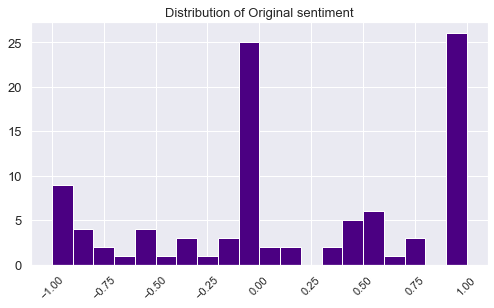

In [21]:
# view distribution of compound polarity scores from vader sentiment analyzer
distribution(train, 'original_sentiment', 20)

In [22]:
# view sentiment scores
train.groupby('language').original_sentiment.agg(['mean', 'median'])

,mean,median
language,,
C,-0.174509,0.00000
C#,-0.285467,-0.39895
C++,0.316700,0.07720
HTML,0.334300,0.00000
Java,0.244657,0.00000
JavaScript,0.507467,0.93420
Lua,-0.190133,-0.30795
PHP,0.116555,0.00000
Python,0.658933,0.95720


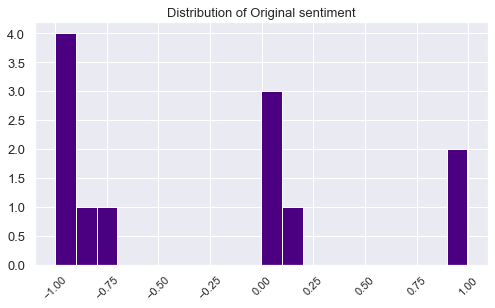

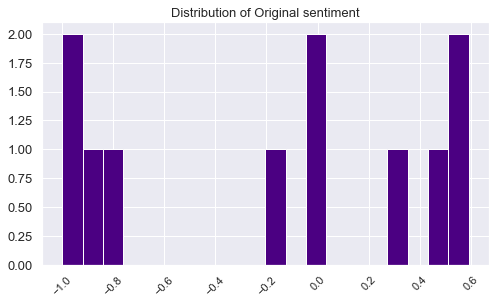

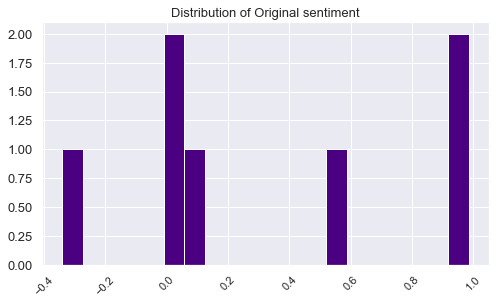

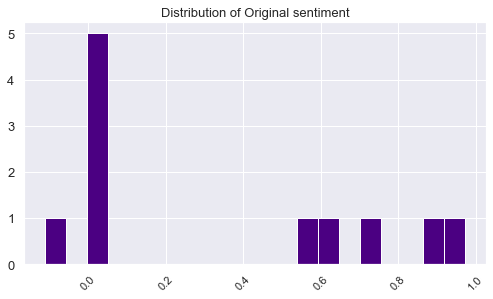

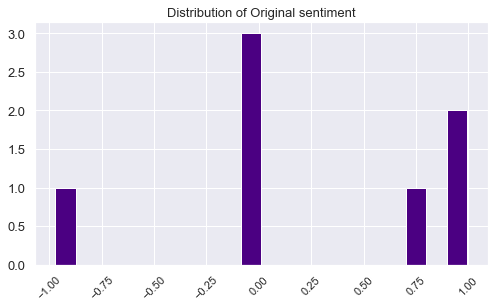

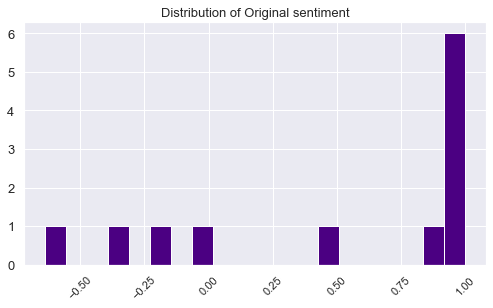

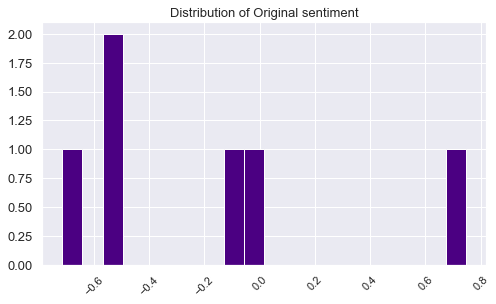

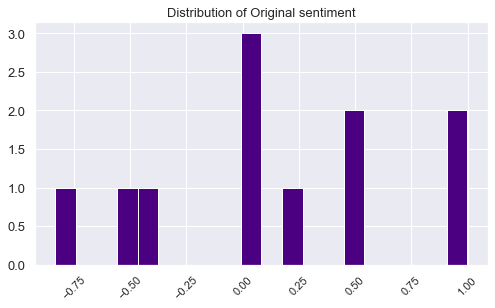

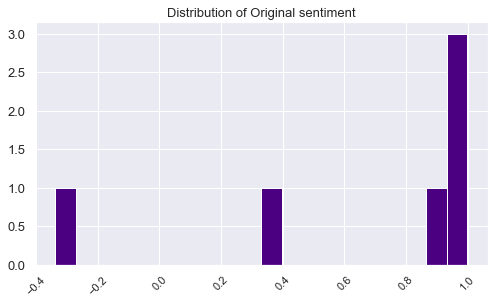

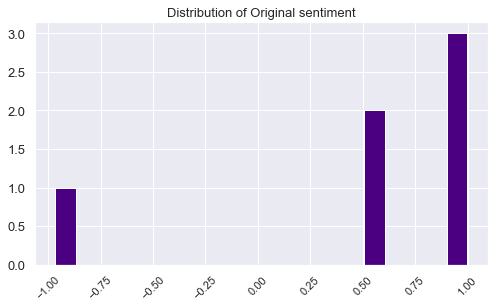

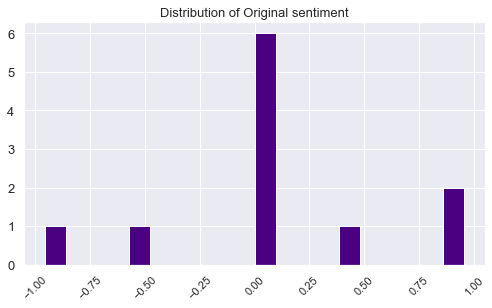

In [23]:
for language in languages:
    distribution(language, 'original_sentiment', bins = 20)

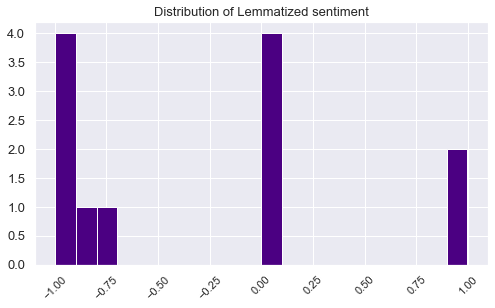

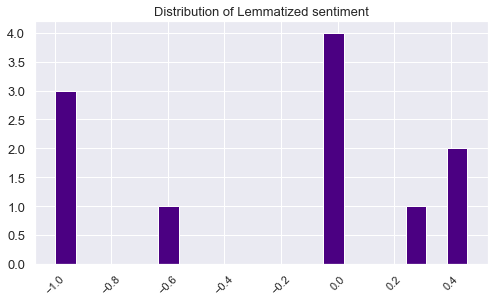

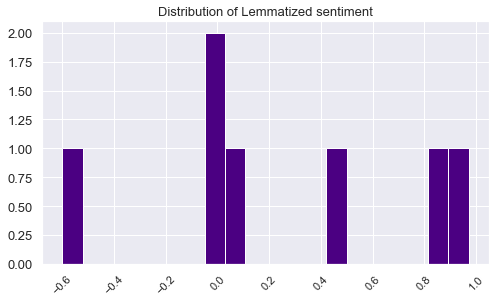

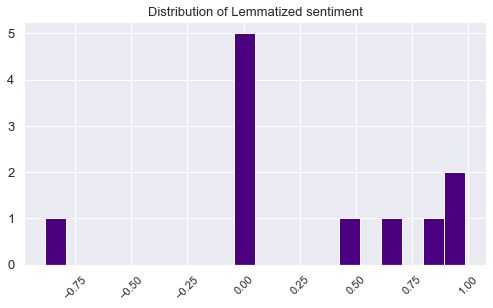

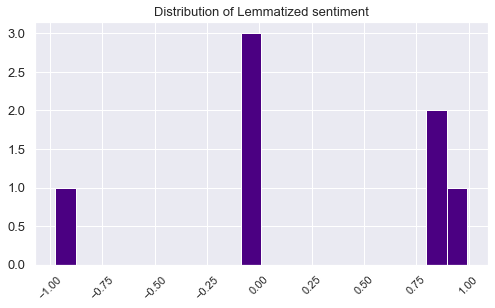

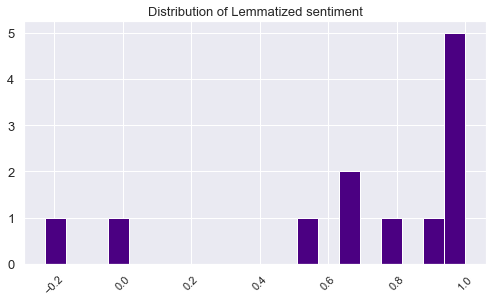

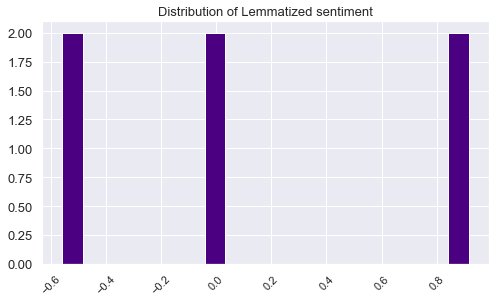

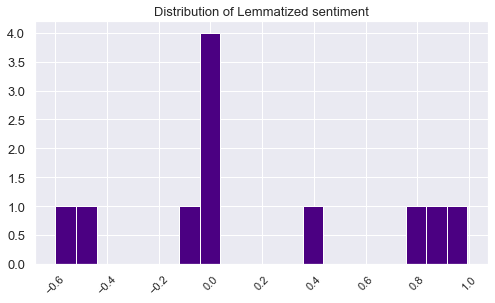

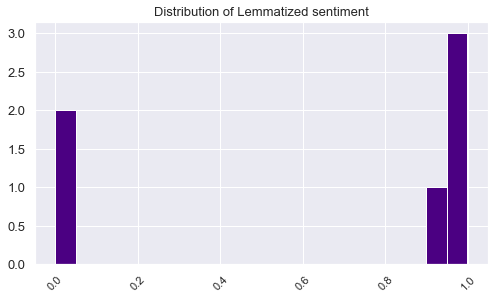

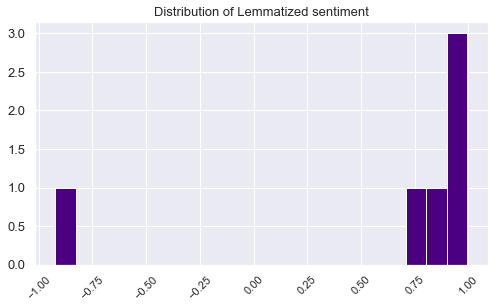

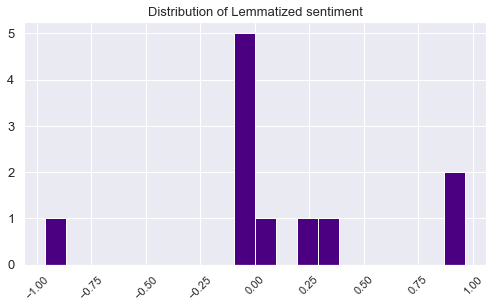

In [24]:
for language in languages:
    distribution(language, 'lemmatized_sentiment', bins = 20)

In [25]:
# view sentiment scores
train.groupby('language').lemmatized_sentiment.agg(['mean', 'median'])

,mean,median
language,,
C,-0.215409,0.00000
C#,-0.289267,-0.38915
C++,0.254400,0.07720
HTML,0.265827,0.00000
Java,0.244843,0.00000
JavaScript,0.688667,0.83485
Lua,0.114000,-0.01290
PHP,0.175227,0.00000
Python,0.654833,0.95560


In [26]:
# get average message length across languages
train.groupby('language').message_length.mean()

language
C             1252.181818
C#            2353.916667
C++           1031.000000
HTML          1059.454545
Java          1313.142857
JavaScript    8208.416667
Lua            640.666667
PHP            777.909091
Python        4337.500000
Ruby          2392.833333
SourcePawn     611.545455
Name: message_length, dtype: float64

Is there any significant difference in average message length?

#### Null Hypothesis: Average message length for languages is about the same.
#### Alternate Hypothesis: Average message length between languages is significantly different.

### Assumptions for ANOVA Test:
* X Independence of observations - Assumption is that message length for one language is not dependent of message length for another.
* Normally Distributed Samples - Samples are not normally distrubuted.
* Equal Variances - Variances are probably different at a glance.

Only one of these assumptions is met. We will move forward with a Kruskal-Wallis test.

In [27]:
languages[0]

,repo,language,readme_contents,link,clean,stemmed,lemmatized,message_length,original_sentiment,clean_sentiment,stemmed_sentiment,lemmatized_sentiment
28,Unity-Technologies/ZombieObjectDetector,C#,# Zombie Object Detector\n\nScripts to detect ...,https://github.com/Unity-Technologies/ZombieOb...,zombie object detectorscripts to detect and di...,zombi object detectorscript detect diagnos zom...,zombie object detectorscripts detect diagnose ...,1399,0.9682,0.9694,0.9231,0.9741
131,Zombiefied7/ZombiefiedZombieApocalpyse,C#,,https://github.com/Zombiefied7/ZombiefiedZombi...,,,,0,0.0000,0.0000,0.0000,0.0000
119,gdg-nova/game1,C#,[ ] Fix gameplay on ipad\n\n[ ] The buildings ...,https://github.com/gdg-nova/game1,fix gameplay on ipad the buildings still disap...,fix gameplay ipad build still disappear zombi ...,fix gameplay ipad building still disappear zom...,1681,-0.8517,-0.9285,-0.9565,-0.9217
136,blazn420/BLAZN-CW-TOOL,C#,﻿# FREE COLD WAR ZOMBIES CHEAT SOURCE\nNavigat...,https://github.com/blazn420/BLAZN-CW-TOOL,free cold war zombies cheat sourcenavigate the...,free cold war zombi cheat sourcenavig panel us...,free cold war zombie cheat sourcenavigate pane...,782,-0.9017,-0.8402,-0.8442,-0.7783
19,rico345100/unity-zombie-defence-fps-example,C#,# Unity Zombie Defence FPS Example\nThis is th...,https://github.com/rico345100/unity-zombie-def...,unity zombie defence fps examplethis is the ex...,uniti zombi defenc fp examplethi exampl zombi ...,unity zombie defence fps examplethis example z...,2677,-0.9964,-0.9980,-0.9648,-0.9821
104,colonelsalt/ZombieDeathBoomECS,C#,"# ZombieDeathBoomECS\n### Entities, components...",https://github.com/colonelsalt/ZombieDeathBoomECS,zombiedeathboomecs entities components systems...,zombiedeathboomec entiti compon system zombies...,zombiedeathboomecs entity component system zom...,412,0.1511,0.0772,0.0772,0.0772
13,CompleteUnityDeveloper/09-ZombieRunner-Original,C#,# Complete Unity Developer - Section 9 - Zombi...,https://github.com/CompleteUnityDeveloper/09-Z...,complete unity developer section 9 zombie runn...,complet uniti develop section 9 zombi runnerth...,complete unity developer section 9 zombie runn...,4058,0.9955,0.9958,0.9413,0.9959
25,JoakimCarlsson/ColdWarZombieTrainer,C#,# ColdWarZombieTrainer\nCold War Zombie Traine...,https://github.com/JoakimCarlsson/ColdWarZombi...,coldwarzombietrainercold war zombie trainer wo...,coldwarzombietrainercold war zombi trainer wor...,coldwarzombietrainercold war zombie trainer wo...,349,-0.7979,-0.8519,-0.8519,-0.8519
66,rico345100/unity-zombie-defense-fps-multiplaye...,C#,# Unity Zombie FPS Co-op Examples\nMultiplayer...,https://github.com/rico345100/unity-zombie-def...,unity zombie fps coop examplesmultiplayer vers...,uniti zombi fp coop examplesmultiplay version ...,unity zombie fps coop examplesmultiplayer vers...,5572,-0.9983,-0.9987,-0.9881,-0.9868
124,minusreality/virtual-reality,C#,Creator: dewayne@minus-reality.com\nMore info ...,https://github.com/minusreality/virtual-reality,creator dewayneminusrealitycommore info at htt...,creator dewayneminusrealitycommor info httpwww...,creator dewayneminusrealitycommore info httpww...,62,0.0000,0.0000,0.0000,0.0000


In [28]:
c_sharp.message_length

28      1399
131        0
119     1681
136      782
19      2677
104      412
13      4058
25       349
66      5572
124       62
97         0
81     11255
Name: message_length, dtype: int64

In [29]:
# run kruskal-wallis test
k_stat, p = stats.kruskal(c_sharp.message_length,
                          c.message_length,
                          c_prus_prus.message_length,
                          html.message_length,
                          java.message_length,
                          java_script.message_length,
                          lua.message_length,
                          php.message_length,
                          python.message_length,
                          ruby.message_length, 
                          source_pawn.message_length
                         )
# view test results
k_stat, p

(18.631319726215292, 0.0452032087326726)

The low p-value allows me 95% confidence in rejecting the null hypothesis that average message lengths are about the same